# SynthPop example use/tutorial notebook
Start by importing the package

In [22]:
import synthpop 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Example 1

#### Step 1: SynthPop model object setup

In this step, we set up the configuration of our Galactic model.

There are a number of ways you can initialize a SynthPop model. Let's take a look at the easiest one first, where you just use a specific config file. This is a great option for testing to make sure you can run SynthPop properly.

In this case, any parameters not controlled by your config will be pulled from the _default.synthpop_conf.

This step is very fast.

The output will show the configuration files used, and a dictionary that could be copied into a new config file to fully recreate your model version.

In [2]:
mod1 = synthpop.SynthPop('my_config.synthpop_conf')

Execution Date: 05-11-2024 09:28:24


################################ Settings #################################
# reading default parameters from
default_config_file =  /System/Volumes/Data/mnt/g2/scratch/mhuston/code/synthpop/synthpop/config_files/_default.synthpop_conf 
# read configuration from 
config_file = '/System/Volumes/Data/mnt/g2/scratch/mhuston/code/synthpop/synthpop/config_files/my_config.synthpop_conf' 


# copy the following to a config file to redo this model generation -------
{
    "l_set": [
        1
    ],
    "l_set_type": "list",
    "b_set": [
        1
    ],
    "b_set_type": "list",
    "name_for_output": "default_synthpop",
    "model_name": "besancon_Robin2003",
    "solid_angle": 0.0001,
    "solid_angle_unit": "deg^2",
    "random_seed": 464798439,
    "sun": {
        "x": -8.178,
        "y": 0.0,
        "z": 0.017,
        "u": 12.9,
        "v": 245.6,
        "w": 7.78,
        "l_apex_deg": 56.24,
        "b_apex_deg": 22.54
    },
    "lsr": {
 

#### Step 2: Initialize populations

In this step, SynthPop will process your configuration and initialize all of the modules for each of your Populations. 

This will take several seconds, possibly more if you have modules that e.g. load large extinction map files.

The output will log each population as it gets read in from its file and initialized

In [3]:
mod1.init_populations()



########################## initialize population ##########################
read Population files from besancon_Robin2003


# Population 0;  bulge ----------------------------------------------------
# Initialize Population 0 (bulge) from 
pop_file = '/System/Volumes/Data/mnt/g2/scratch/mhuston/code/synthpop/synthpop/models/besancon_Robin2003/bulge.popjson'


# Population 1;  halo -----------------------------------------------------
# Initialize Population 1 (halo) from 
pop_file = '/System/Volumes/Data/mnt/g2/scratch/mhuston/code/synthpop/synthpop/models/besancon_Robin2003/halo.popjson'


# Population 2;  thick_disk -----------------------------------------------
# Initialize Population 2 (thick_disk) from 
pop_file = '/System/Volumes/Data/mnt/g2/scratch/mhuston/code/synthpop/synthpop/models/besancon_Robin2003/thick_disk.popjson'


# Population 3;  thin_disk_1 ----------------------------------------------
# Initialize Population 3 (thin_disk_1) from 
pop_file = '/System/Volumes/Da

#### Step 3: process your configured locations

In this step, SynthPop will generate a catalog of stars for each sightline specified in your configration. 

This step's runtime depends on your solid angle, the density of the region of sky selected, and a number of other factors. It may take several seconds to several minutes, typically less than a minute for the use cases tested.

The output will log the generation for each sightline and population therein.

In [4]:
mod1.process_all()



############################# update location #############################
# set location to: 
l, b = (1.00 deg, 1.00 deg)
# set solid_angle to:
solid_angle = 1.000e-04 deg^2


############################# Generate Field ##############################


# Population 0;  bulge ----------------------------------------------------
# From density profile (number density)
expected_total_iMass = 46282.3418
expected_total_eMass = 25335.9425
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5474
n_expected_stars = 80650.0917
# From Generated Field:
generated_stars = 80973
generated_total_iMass = 45529.6944
generated_total_eMass = 25183.7135
det_mass_loss_corr = 0.5531
# Done


# Population 1;  halo -----------------------------------------------------
# From density profile (number density)
expected_total_iMass = 53.4651
expected_total_eMass = 28.0969
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5255
n_expected_stars = 93.1665
# From Generated Field:
generated_stars = 81

#### Step 4: examine your catalog

The output is a csv catalog of stars with their positions, velocities, properties, and photometry.

In [13]:
cat1 = pd.read_csv('synthpop/outputfiles/default_synthpop/besancon_Robin2003_l1.000_b1.000.csv')
cat1

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,l,b,vr_bc,...,Bessell_V,Bessell_I,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,2MASS_J,2MASS_H,2MASS_Ks,Z087,W146
0,0.0,0.406657,10.000000,0.389733,0.406649,0.0,4.742414,0.995604,1.000943,-136.365970,...,35.513191,28.161582,31.647166,36.166181,28.443648,22.877286,21.157883,20.411681,26.713248,22.499392
1,0.0,0.624874,10.000000,-0.039297,0.624835,0.0,4.797703,1.000649,1.001355,60.312642,...,31.974442,25.926867,28.910694,32.635529,26.092146,21.288997,19.500635,18.840566,24.698314,20.824286
2,0.0,0.330833,10.000000,-0.176018,0.330827,0.0,4.771357,0.996924,1.004103,-77.998124,...,34.765662,28.087963,31.358981,35.430145,28.333193,23.188190,21.450237,20.703871,26.767128,22.769570
3,0.0,0.358105,10.000000,-0.060066,0.358098,0.0,4.769446,1.003326,1.000890,60.217982,...,34.743452,27.985881,31.291814,35.407966,28.242576,23.050372,21.310997,20.565816,26.652259,22.633605
4,0.0,0.471313,10.000000,-0.022853,0.471299,0.0,4.798249,1.001136,1.002614,-55.964668,...,33.725721,27.195978,30.407673,34.389790,27.426270,22.365511,20.607494,19.874803,25.897610,21.926552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13886,9.0,0.724372,7.786090,-0.440393,0.724286,0.0,14.599752,1.001319,0.995350,49.821335,...,36.538238,29.316582,32.777416,37.329154,29.450641,23.612063,21.679759,20.883923,27.766774,23.140490
13887,9.0,0.835418,8.896699,-0.507017,0.835171,0.0,14.535266,0.996863,1.000754,40.347266,...,35.223765,28.208633,31.529366,35.959893,28.328299,22.670295,20.874469,20.105086,26.691822,22.240815
13888,9.0,0.710948,9.181738,-0.489223,0.710850,0.0,14.647148,0.998550,0.998945,36.494100,...,36.542603,29.327292,32.784625,37.332205,29.461451,23.626526,21.697215,20.901942,27.777867,23.155895
13889,9.0,0.938736,8.656729,-0.133001,0.938400,0.0,14.773295,0.999877,1.000843,12.271955,...,34.877398,27.841626,31.180044,35.629347,27.961496,22.291971,20.493506,19.719265,26.323653,21.862423


## Example 2

#### Step 1: SynthPop model object setup

Here's another option for setting up your model, where you use your own default configuration and put in a few parameters directly. Here, we override the defaults for the extinction map and synthetic photometry, and give our output files a distinct name.

I like to use this method when I'm testing how changing a single factor (like the extinction map) changes the output for a test sightline.

Here, in addition to what we see above, we get a warning that some manditory parameters must be set in order to process the model. We'll get to that in a couple of steps.

In [14]:
mod2 = synthpop.SynthPop('macy_defaults.synthpop_conf',
                         extinction_map_kwargs={'name':'maps_from_dustmaps', 
                                                'dustmap_name': 'marshall'},
                         chosen_bands = ['Bessell_U', 'Bessell_B', 'Bessell_V', 'Bessell_R', 'Bessell_I'],
                         maglim = ['Bessell_I', 22, "remove"],
                         post_processing_kwargs=[{"name": "ProcessDarkCompactObjects","remove": False}],
                         name_for_output='mod2test'
                        )



################################ Settings #################################
# reading default parameters from
default_config_file =  /System/Volumes/Data/mnt/g2/scratch/mhuston/code/synthpop/synthpop/config_files/_default.synthpop_conf 
# read configuration from 
config_file = '/System/Volumes/Data/mnt/g2/scratch/mhuston/code/synthpop/synthpop/config_files/macy_defaults.synthpop_conf' 


# copy the following to a config file to redo this model generation -------
{
    "l_set": null,
    "l_set_type": null,
    "b_set": null,
    "b_set_type": null,
    "name_for_output": "mod2test",
    "model_name": "Huston2024_NSD",
    "solid_angle": null,
    "solid_angle_unit": "deg^2",
    "random_seed": 43920921,
    "sun": {
        "x": -8.178,
        "y": 0.0,
        "z": 0.017,
        "u": 12.9,
        "v": 245.6,
        "w": 7.78,
        "l_apex_deg": 56.24,
        "b_apex_deg": 22.54
    },
    "lsr": {
        "u_lsr": 1.8,
        "v_lsr": 233.4,
        "w_lsr": 0.53
    },
   

#### Step 2: initialize populations

In [15]:
mod2.init_populations()



########################## initialize population ##########################
read Population files from Huston2024_NSD


# Population 0;  bulge ----------------------------------------------------
# Initialize Population 0 (bulge) from 
pop_file = '/System/Volumes/Data/mnt/g2/scratch/mhuston/code/synthpop/synthpop/models/Huston2024_NSD/bulge.popjson'


# Population 1;  halo -----------------------------------------------------
# Initialize Population 1 (halo) from 
pop_file = '/System/Volumes/Data/mnt/g2/scratch/mhuston/code/synthpop/synthpop/models/Huston2024_NSD/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
# Initialize Population 2 (nsd) from 
pop_file = '/System/Volumes/Data/mnt/g2/scratch/mhuston/code/synthpop/synthpop/models/Huston2024_NSD/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
# Initialize Population 3 (thick_disk) from 
pop_file = '/System/Volumes/Data/mnt/g2/scratch/mhuston/code/

#### Step 3: run catalogs we specify here

Because we did not provide sight lines in our configuration, we must set them here. 

mod2.process_all() cannot be run

Here, we capture the resulting DataFrame and distance distribution from the process_location function.

In [16]:
cat2, distr2 = mod2.process_location(l_deg=3, b_deg=-1, solid_angle=1e-3, solid_angle_unit='deg^2')




############################# update location #############################
# set location to: 
l, b = (3.00 deg, -1.00 deg)
# set solid_angle to:
solid_angle = 1.000e-03 deg^2


############################# Generate Field ##############################


# Population 0;  bulge ----------------------------------------------------
# From density profile (number density)
expected_total_iMass = 234902.2649
expected_total_eMass = 128112.4528
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5454
n_expected_stars = 409332.9872
# Determine velocities when position are generated 


 362297 / 362297


# From Generated Field:
generated_stars = 410423
generated_total_iMass = 235166.7243
generated_total_eMass = 128480.0868
det_mass_loss_corr = 0.5463
# Done


# Population 1;  halo -----------------------------------------------------
# From density profile (number density)
expected_total_iMass = 442.4875
expected_total_eMass = 233.5773
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5279
n_expected_stars = 771.0642
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 774
generated_total_iMass = 379.3515
generated_total_eMass = 235.0951
det_mass_loss_corr = 0.6197
# Done


# Population 2;  nsd ------------------------------------------------------
# From density profile (number density)
expected_total_iMass = 864.9079
expected_total_eMass = 471.9673
average_iMass_per_star = 0.5739
mass_loss_correction = 0.5457
n_expected_stars = 1507.1602
# Determine velocities when position are generated 
# From Generated Field:
generated_stars = 1492
g

#### Step 4: examine our output
Let's take a look at our output catalog:

In [19]:
cat2

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,l,b,vr_bc,...,logg,Fe/H_evolved,log_radius,phase,Bessell_U,Bessell_B,Bessell_V,Bessell_R,Bessell_I,Dim_Compact_Object_Flag
2,0.0,0.884263,10.000000,-0.215292,0.883951,0.0,3.464912,2.993194,-0.984463,-160.071435,...,4.341610,-0.303280,0.021353,0.000000,31.771236,29.607779,25.764768,23.721915,21.411662,1
98,0.0,0.959444,10.000000,-0.361673,0.914860,0.0,4.930326,3.010625,-1.014036,-10.523593,...,2.380217,-0.325710,1.009573,3.000000,33.198162,29.922088,24.850887,22.200947,19.224320,1
1418,0.0,0.978091,10.000000,-0.243346,0.975368,0.0,5.949222,3.004311,-1.006277,-85.485661,...,2.136167,-0.206643,1.145557,2.000000,35.783895,31.819627,26.154014,23.206300,19.928235,1
5651,0.0,0.962583,10.000000,-0.325067,0.960136,0.0,6.425932,2.983619,-1.004736,-56.776482,...,2.274922,-0.291510,1.072717,2.000000,36.947725,32.979221,27.143249,24.102407,20.697517,1
7070,0.0,0.995361,10.000000,-0.188897,0.944409,0.0,6.517336,2.999686,-0.993667,-66.302844,...,0.599730,-0.147918,1.906711,4.380984,41.944145,35.929692,28.332412,24.274704,19.626023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488731,10.0,1.028353,7.813922,-0.363143,0.988792,0.0,6.582072,3.010663,-1.009831,10.124801,...,2.392148,-0.323309,1.020461,3.000000,35.681493,32.101221,26.583815,23.702009,20.454550,1
489111,10.0,0.986975,8.041848,-0.546975,0.947954,0.0,6.689600,2.992764,-1.006978,37.424300,...,2.400609,-0.510892,1.007118,3.000000,36.139989,32.599651,26.990394,24.047706,20.710824,1
491455,10.0,0.976737,9.459173,-0.318794,0.975866,0.0,7.434957,3.004716,-1.008608,33.095969,...,2.744878,-0.285451,0.841237,2.000000,37.474578,33.769819,28.121944,25.169546,21.849198,1
496735,10.0,0.989058,9.392285,-0.275921,0.987005,0.0,8.885837,3.015508,-1.005731,-10.472212,...,2.230008,-0.239610,1.101166,2.000000,38.815723,34.600393,28.465644,25.271997,21.695386,1


Here's the distribution of distances for the stars in our catalog. We see many stars in the near dist that are bright and close. We also pick up a number of the brighter stars in the dense central galactic bulge. Stars beyond this are generally too dim for our magnitude limit.

Text(0, 0.5, 'N stars')

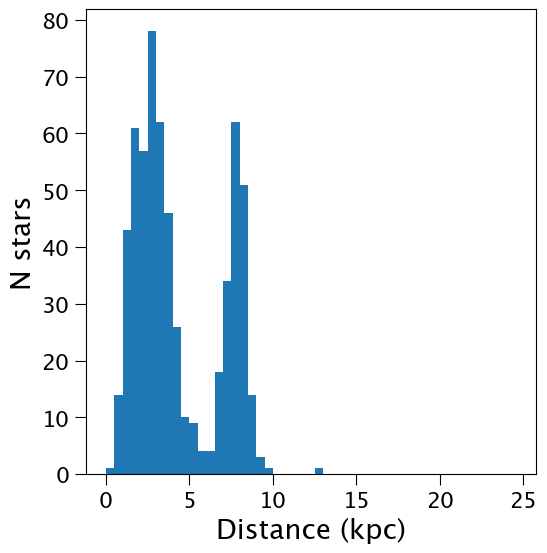

In [28]:
plt.hist(cat2.Dist, bins=np.arange(0,25,0.5));
plt.xlabel('Distance (kpc)'); plt.ylabel('N stars')